In [2]:
import numpy as np
import pandas as pd
import plotly as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import re
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',500)

In [3]:
data = pd.read_excel('Data_Train.xlsx')


In [4]:
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [5]:
data.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

In [6]:
data['Reviews'][0].split()[0]

'4.0'

In [7]:
len(data)

6237

In [8]:
data['Ratings_1'] = data['Reviews']
for i in range(len(data)):
    data['Ratings_1'][i] = float(data['Reviews'][i].split()[0])

In [9]:
data['Cust_Reviews'] = data['Ratings']
for i in range(len(data)):
    data['Cust_Reviews'][i] = data['Ratings'][i].split()[0]
    data['Cust_Reviews'][i] = data['Cust_Reviews'][i].replace(',','')
data['Cust_Reviews'] = data['Cust_Reviews'].astype(int)

In [10]:
data['Cust_Reviews'].dtypes

dtype('int32')

In [11]:
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Ratings_1,Cust_Reviews
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4,8
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,14
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,6
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1,13
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5,1


In [12]:
data['Ratings_1'].min()

1.0

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
 9   Ratings_1     6237 non-null   object 
 10  Cust_Reviews  6237 non-null   int32  
dtypes: float64(1), int32(1), object(9)
memory usage: 511.8+ KB


In [14]:
data['Author'].value_counts()

Agatha Christie         69
Ladybird                49
DK                      48
Albert Uderzo           34
Herge                   34
                        ..
Steve Vai                1
Kavitha Yaga Buggana     1
Om Swami                 1
Gill Paul                1
Tove Jansson             1
Name: Author, Length: 3679, dtype: int64

In [15]:
a = data.groupby('Author')['Title'].sum().to_dict()

In [16]:
data[data['Author']=="0, Butterfield, Ngondi, Kerr"]

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Ratings_1,Cust_Reviews
2146,A Dictionary of Computer Science (Oxford Quick...,"0, Butterfield, Ngondi, Kerr","Paperback,– 21 Jan 2016",3.7 out of 5 stars,4 customer reviews,This bestselling dictionary has been revised t...,Dictionaries,"Computing, Internet & Digital Media",400.0,3.7,4


In [17]:
len(data['BookCategory'].unique())

11

In [18]:
data.groupby('BookCategory')['Author'].count()

BookCategory
Action & Adventure                      818
Arts, Film & Photography                517
Biographies, Diaries & True Accounts    596
Comics & Mangas                         583
Computing, Internet & Digital Media     510
Crime, Thriller & Mystery               723
Humour                                  540
Language, Linguistics & Writing         594
Politics                                325
Romance                                 560
Sports                                  471
Name: Author, dtype: int64

In [19]:
out = pd.DataFrame(data['BookCategory'].value_counts().to_dict().items(),columns=['Genere','counts'])

In [20]:
out.style.background_gradient(cmap='viridis')

,Genere,counts
0,Action & Adventure,818
1,"Crime, Thriller & Mystery",723
2,"Biographies, Diaries & True Accounts",596
3,"Language, Linguistics & Writing",594
4,Comics & Mangas,583
5,Romance,560
6,Humour,540
7,"Arts, Film & Photography",517
8,"Computing, Internet & Digital Media",510
9,Sports,471


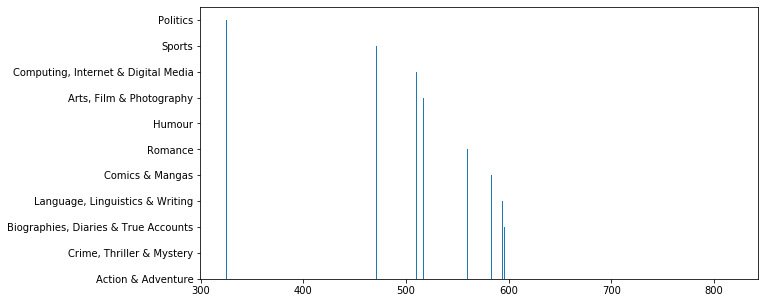

In [21]:
plt.figure(figsize = (10, 5))
plt.bar(out['counts'],out['Genere'])
#plt.xlabel()
#plt.ylabel("Genere")
#plt.title("Books in different Generes")
plt.show()

In [22]:
data['Edition_Type'] = data['Edition']
data['Edition_Date'] = data['Edition']
for i in range(len(data['Edition'])):
    data['Edition_Type'][i] = data['Edition'][i].split(',– ')[0]
    data['Edition_Date'][i] = data['Edition'][i].split(',– ')[1]
    
#data['Edition'][0].split(',– ')[0]

In [23]:
data['Edition_Date'][0:10]

0           10 Mar 2016
1            7 Nov 2012
2           25 Feb 1982
3            5 Oct 2017
4           10 Oct 2006
5            5 May 2009
6            5 Oct 2017
7    Import, 1 Mar 2018
8           15 Dec 2015
9           26 Mar 2013
Name: Edition_Date, dtype: object

In [24]:
data['Edition'].unique()

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Paperback,– 26 Sep 2006',
       'Paperback,– 21 Nov 2016', 'Paperback,– 15 Jan 2015'], dtype=object)

In [25]:
out1 = []
out2 = []
for i in data['Edition']:
    tw =  re.findall("\d+\s\w{3}\s\d{4}|\w+\s\d+|\d+",i)
    if len(tw) == 0:
        out1.append(i)
    else:
        out2.append(i)       


In [26]:
out1

['Paperback,– Abridged, Import',
 'Plastic Comb,– DVD, NTSC',
 'Paperback,– Illustrated, Import',
 'Paperback,– Illustrated, Import',
 'Paperback,– Large Print, Import',
 'Hardcover,– Import, Facsimile',
 'Paperback,– Abridged, Audiobook, Box set',
 'Paperback,– Large Print, Import',
 'Paperback,– Student Edition, Special Edition',
 'Hardcover,– Abridged, Audiobook, Box set',
 'Hardcover,– Audiobook, Unabridged',
 'Paperback,– Abridged, Audiobook, Large Print',
 'Paperback,– Abridged, Audiobook, Box set',
 'Paperback,– Illustrated, Import',
 'Paperback,– Abridged, Audiobook, Box set',
 'Hardcover,– Facsimile, Import',
 'Paperback,– Illustrated, Large Print, Audiobook',
 'Paperback,– Illustrated, Import',
 'Hardcover,– Illustrated, Import',
 'Paperback,– Abridged, Audiobook, Box set',
 'Paperback,– Illustrated, Large Print']

In [27]:
data['Edition_Type'] = data['Edition']
for i in range(len(data['Edition'])):
    data['Edition_Type'][i] = data['Edition'][i].split(',')[0]
data['Edition_Type'] = data['Edition_Type'].str.replace('(','')
data['Edition_Type'] = data['Edition_Type'].str.replace(')','')

In [28]:
data['Edition_Type'].unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       'Kannada', 'Product Bundle', 'Library Binding', 'German',
       'Leather Bound', 'French', 'Spanish'], dtype=object)

In [29]:
lis = []
for i in range(len(data['Edition'])):
    a = (len(data['Edition'][i].split(',')))
    if a == 4:
        print((data['Edition'][i].split(',')))

['Paperback', '– Abridged', ' Audiobook', ' Box set']
['Hardcover', '– Abridged', ' Audiobook', ' Box set']
['Paperback', '– Abridged', ' Audiobook', ' Large Print']
['Paperback', '– Abridged', ' Audiobook', ' Box set']
['Paperback', '– Abridged', ' Audiobook', ' Box set']
['Paperback', '– Illustrated', ' Large Print', ' Audiobook']
['Paperback', '– Abridged', ' Audiobook', ' Box set']
['(Spanish)', 'Paperback', '– Import', ' 7 Jun 2012']


In [30]:
data['Edition_Test'] = data['Edition']
for i in range(len(data['Edition'])):
    if data['Edition'][i].split(',')[0][0] == '(':
        data['Edition_Test'][i] = data['Edition'][i].split(',')[0]
    else:    
        data['Edition_Test'][i] = np.nan
data['Edition_Test'] = data['Edition_Test'].str.replace('(','')
data['Edition_Test'] = data['Edition_Test'].str.replace(')','')

In [31]:
data['Edition_Test'].unique()

array([nan, 'Kannada', 'German', 'French', 'Spanish'], dtype=object)

In [32]:
for i in range(len(data['Edition'])):
    tw =  re.findall("\w+\,– ",data['Edition'][i])[0]
    if len(tw) != 0:
        data['Edition_Type'][i] = tw.split(',')[0]
        #data['Edition_Rem'][i] = tw.split(',')[1:]
        #print(tw)
    else:
        data['Edition_Type'][i] = np.nan
        
        
        

In [34]:
data['level1'] = data['Edition']
for i in range(len(data['Edition'])):
    #print(data['Edition'][i])
    if len(re.findall("\,– \w{5,}",data['Edition'][i])) != 0:
        wq = re.findall("\,– \w{5,}",data['Edition'][i])[0]
        #print(wq.split('– ')[1])
        data['level1'][i] = wq.split('– ')[1]      
        #print(data['level1'][i],i)
    else:
        data['level1'][i] = np.nan

In [35]:
data['level1'].unique()

array([nan, 'Import', 'Deckle', 'International', 'Unabridged', 'Special',
       'Student', 'Illustrated', 'Abridged', 'Bargain', 'Large',
       'Audiobook', 'Print', 'Facsimile', 'Deluxe', 'Kindle', 'EveryBook',
       'ADPCM'], dtype=object)

In [36]:
books_name = pd.DataFrame(data['Title'].value_counts().to_dict().items(),columns = ['Book_Name','Count'])

plt.bar(books_name['Book_Name'],books_name['Count'])

In [37]:
for i in range(len(data['Edition'])):
    k = data['Edition'][i].split(',')
    if len(k) == 4:
        print(k,i)

['Paperback', '– Abridged', ' Audiobook', ' Box set'] 1605
['Hardcover', '– Abridged', ' Audiobook', ' Box set'] 1769
['Paperback', '– Abridged', ' Audiobook', ' Large Print'] 2229
['Paperback', '– Abridged', ' Audiobook', ' Box set'] 2660
['Paperback', '– Abridged', ' Audiobook', ' Box set'] 3511
['Paperback', '– Illustrated', ' Large Print', ' Audiobook'] 3960
['Paperback', '– Abridged', ' Audiobook', ' Box set'] 5117
['(Spanish)', 'Paperback', '– Import', ' 7 Jun 2012'] 5866


In [38]:
txt = "(Spanish)', 'Paperback', '– Import', ' 7 Jun 2012"
re.findall("\,– \w+",txt)

[]

In [39]:
data['level2'] = data['Edition']
data['level3'] = np.nan
for i in range(len(data['Edition'])):
    if len(re.findall("\,\s\D{6,}",data['Edition'][i])) != 0:
        kw = re.findall("\,\s\D{6,}",data['Edition'][i])[0]
        #print(kw.split(',')[1],i,data['level1'][i])
        data['level2'][i] = kw.split(',')[1]
        if len(kw.split(',')) == 3:
            data['level3'][i] = kw.split(',')[2]
        else:
            data['level3'][i] = np.nan
            #print(data['level3'][i],i)
    else:
        data['level2'][i] = np.nan
        
            
            
        

In [40]:
data.iloc[1605]

Title           An Introduction to Linguistics: Language, Gram...
Author                                                       Syal
Edition                  Paperback,– Abridged, Audiobook, Box set
Reviews                                        4.1 out of 5 stars
Ratings                                       29 customer reviews
Synopsis        This compact and engagingly elegant text, now ...
Genre                                                 Engineering
BookCategory                      Language, Linguistics & Writing
Price                                                         399
Ratings_1                                                     4.1
Cust_Reviews                                                   29
Edition_Type                                            Paperback
Edition_Date                         Abridged, Audiobook, Box set
Edition_Test                                                  NaN
level1                                                   Abridged
level2    

In [41]:
data['Edition'][5866]

'(Spanish),Paperback,– Import, 7 Jun 2012'

In [42]:
data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Ratings_1,Cust_Reviews,Edition_Type,Edition_Date,Edition_Test,level1,level2,level3
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4,8,Paperback,10 Mar 2016,NaN,NaN,NaN,NaN
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,14,Paperback,7 Nov 2012,NaN,NaN,NaN,NaN
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,6,Paperback,25 Feb 1982,NaN,NaN,NaN,NaN
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1,13,Paperback,5 Oct 2017,NaN,NaN,NaN,NaN
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5,1,Hardcover,10 Oct 2006,NaN,NaN,NaN,NaN


In [43]:
data['Edition_Date'] = data['Edition']
for i in range(len(data['Edition'])):
    st = re.findall('\d+\s\w{3}\s\d{4}|\w+\s\d+|\d+',data['Edition'][i])
    if len(st) != 0:
        #print(st[0],i)
        data['Edition_Date'][i] =st[0]
    else:
        data['Edition_Date'][i] =np.nan
        print(i)

169
235
582
972
1233
1558
1605
1631
1643
1769
2101
2229
2660
2779
3511
3875
3960
4036
4403
5117
5860


In [44]:
data['Edition_Date']

0       10 Mar 2016
1        7 Nov 2012
2       25 Feb 1982
3        5 Oct 2017
4       10 Oct 2006
           ...     
6232     8 Aug 2018
6233    21 Nov 2016
6234     8 Jun 2006
6235    15 Jan 2015
6236    21 Dec 2016
Name: Edition_Date, Length: 6237, dtype: object

In [45]:
data['Edition_Date'] = data['Edition_Date'].astype(str)

In [46]:
data['Date'] = np.nan
data['Month'] = np.nan
data['Year'] = np.nan
for i in range(len(data['Edition_Date'])):
    #kt = re.findall('\d+\s\w{3}\s\d{4}',data['Edition_Date'][i])
    if data['Edition_Date'][i] is not None:
        st = data['Edition_Date'][i].split(' ')
        if len(st) == 3:
            data['Date'][i] = st[0]
            data['Month'][i] = st[1]
            data['Year'][i] = st[2]
        elif len(st) == 2:
            data['Date'][i] = np.nan
            data['Month'][i] = st[0]
            data['Year'][i] = st[1]
        else:
            data['Date'][i] = np.nan
            data['Month'][i] = np.nan
            data['Year'][i] = st[0]
            
        
    

In [47]:
print(data['Date'].isnull().sum())
print(data['Month'].isnull().sum())
print(data['Year'].isnull().sum())

452
370
21


In [48]:
pd.notnull(data['Edition_Date'])

0       True
1       True
2       True
3       True
4       True
        ... 
6232    True
6233    True
6234    True
6235    True
6236    True
Name: Edition_Date, Length: 6237, dtype: bool

In [49]:
type(np.nan)

float

In [50]:
data['Edition_Date'].dtype

dtype('O')

In [51]:
data['Edition_Date'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
6232    False
6233    False
6234    False
6235    False
6236    False
Name: Edition_Date, Length: 6237, dtype: bool

In [52]:
data.iloc[169]

Title           Long Walk to Freedom: Illustrated Children's e...
Author                                             Nelson Mandela
Edition                              Paperback,– Abridged, Import
Reviews                                        5.0 out of 5 stars
Ratings                                        2 customer reviews
Synopsis        Long Walk to Freedom by Nelson Mandela is the ...
Genre                                  Action & Adventure (Books)
BookCategory                                   Action & Adventure
Price                                                         418
Ratings_1                                                       5
Cust_Reviews                                                    2
Edition_Type                                            Paperback
Edition_Date                                                  nan
Edition_Test                                                  NaN
level1                                                   Abridged
level2    

In [53]:
data.head(20)

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Ratings_1,Cust_Reviews,Edition_Type,Edition_Date,Edition_Test,level1,level2,level3,Date,Month,Year
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4,8,Paperback,10 Mar 2016,NaN,NaN,NaN,NaN,10.0,Mar,2016.0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,14,Paperback,7 Nov 2012,NaN,NaN,NaN,NaN,7.0,Nov,2012.0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,6,Paperback,25 Feb 1982,NaN,NaN,NaN,NaN,25.0,Feb,1982.0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1,13,Paperback,5 Oct 2017,NaN,NaN,NaN,NaN,5.0,Oct,2017.0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5,1,Hardcover,10 Oct 2006,NaN,NaN,NaN,NaN,10.0,Oct,2006.0
5,ChiRunning: A Revolutionary Approach to Effort...,Danny Dreyer,"Paperback,– 5 May 2009",4.5 out of 5 stars,8 customer reviews,The revised edition of the bestselling ChiRunn...,Healthy Living & Wellness (Books),Sports,900.00,4.5,8,Paperback,5 May 2009,NaN,NaN,NaN,NaN,5.0,May,2009.0
6,Death on the Nile (Poirot),Agatha Christie,"Paperback,– 5 Oct 2017",4.4 out of 5 stars,72 customer reviews,Agatha Christie’s most exotic murder mystery\n...,"Crime, Thriller & Mystery (Books)","Crime, Thriller & Mystery",224.00,4.4,72,Paperback,5 Oct 2017,NaN,NaN,NaN,NaN,5.0,Oct,2017.0
7,Yoga Your Home Practice Companion: A Complete ...,Sivananda Yoga Vedanta Centre,"Hardcover,– Import, 1 Mar 2018",4.7 out of 5 stars,16 customer reviews,"Achieve a healthy body, mental alertness, and ...",Sports Training & Coaching (Books),Sports,836.00,4.7,16,Hardcover,1 Mar 2018,NaN,Import,NaN,NaN,1.0,Mar,2018.0
8,Karmayogi: A Biography of E. Sreedharan,M S Ashokan,"Paperback,– 15 Dec 2015",4.2 out of 5 stars,111 customer reviews,Karmayogi is the dramatic and inspiring story ...,Biographies & Autobiographies (Books),"Biographies, Diaries & True Accounts",130.00,4.2,111,Paperback,15 Dec 2015,NaN,NaN,NaN,NaN,15.0,Dec,2015.0
9,"The Iron King (The Accursed Kings, Book 1)",Maurice Druon,"Paperback,– 26 Mar 2013",4.0 out of 5 stars,1 customer review,‘This is the original game of thrones’ George ...,Action & Adventure (Books),Action & Adventure,695.00,4,1,Paperback,26 Mar 2013,NaN,NaN,NaN,NaN,26.0,Mar,2013.0


In [54]:
list1 = data['BookCategory'].unique().tolist()

In [55]:
for i in range(len(list1)):
    list1[i] = list1[i].replace('&',',')

In [56]:
book_cate = ','.join(list1)

In [57]:
list2 = book_cate.split(',')

In [58]:
for i in range(len(list2)):
    list2[i] = (list2[i]).strip()
    

In [59]:
list2

['Action',
 'Adventure',
 'Biographies',
 'Diaries',
 'True Accounts',
 'Humour',
 'Crime',
 'Thriller',
 'Mystery',
 'Arts',
 'Film',
 'Photography',
 'Sports',
 'Language',
 'Linguistics',
 'Writing',
 'Computing',
 'Internet',
 'Digital Media',
 'Romance',
 'Comics',
 'Mangas',
 'Politics']

In [60]:
data_copy = data.copy()

In [61]:
for i in list2:
    data_copy[i] = 1

In [62]:
for i in range(len(data_copy)):
    for j in list2:
        if j in data_copy['BookCategory'][i]:
            data_copy[j][i] = 1
        else:
            data_copy[j][i] = 0

In [63]:
data_copy.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Ratings_1,Cust_Reviews,Edition_Type,Edition_Date,Edition_Test,level1,level2,level3,Date,Month,Year,Action,Adventure,Biographies,Diaries,True Accounts,Humour,Crime,Thriller,Mystery,Arts,Film,Photography,Sports,Language,Linguistics,Writing,Computing,Internet,Digital Media,Romance,Comics,Mangas,Politics
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,4,8,Paperback,10 Mar 2016,NaN,NaN,NaN,NaN,10.0,Mar,2016.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,3.9,14,Paperback,7 Nov 2012,NaN,NaN,NaN,NaN,7.0,Nov,2012.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,4.8,6,Paperback,25 Feb 1982,NaN,NaN,NaN,NaN,25.0,Feb,1982.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,4.1,13,Paperback,5 Oct 2017,NaN,NaN,NaN,NaN,5.0,Oct,2017.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,5,1,Hardcover,10 Oct 2006,NaN,NaN,NaN,NaN,10.0,Oct,2006.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [64]:
data_copy.drop(columns = ['Edition','Reviews','Ratings','BookCategory','Edition_Date','Edition_Test'],inplace = True)

In [65]:
data_copy

,Title,Author,Synopsis,Genre,Price,Ratings_1,Cust_Reviews,Edition_Type,level1,level2,level3,Date,Month,Year,Action,Adventure,Biographies,Diaries,True Accounts,Humour,Crime,Thriller,Mystery,Arts,Film,Photography,Sports,Language,Linguistics,Writing,Computing,Internet,Digital Media,Romance,Comics,Mangas,Politics
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,4,8,Paperback,NaN,NaN,NaN,10.0,Mar,2016.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,3.9,14,Paperback,NaN,NaN,NaN,7.0,Nov,2012.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"""During the time men live without a common Pow...",International Relations,299.00,4.8,6,Paperback,NaN,NaN,NaN,25.0,Feb,1982.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),180.00,4.1,13,Paperback,NaN,NaN,NaN,5.0,Oct,2017.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,965.62,5,1,Hardcover,NaN,NaN,NaN,10.0,Oct,2006.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthropology (Books),322.00,5,2,Paperback,NaN,NaN,NaN,8.0,Aug,2018.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6233,The Chemist,Stephenie Meyer,"In this gripping page-turner, an ex-agent on t...",Contemporary Fiction (Books),421.00,3.3,9,Paperback,NaN,NaN,NaN,21.0,Nov,2016.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6234,The Duke And I: Number 1 in series (Bridgerton...,Julia Quinn,'The most refreshing and radiant love story yo...,Romance (Books),399.00,3.8,3,Paperback,NaN,NaN,NaN,8.0,Jun,2006.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6235,Frostfire (Kanin Chronicles),Amanda Hocking,Frostfire by Amanda Hocking is the stunning fi...,Action & Adventure (Books),319.00,3.5,4,Paperback,NaN,NaN,NaN,15.0,Jan,2015.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
import string
punctuations = string.punctuation

In [67]:
punctuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
clear(text)

In [69]:
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
string.punctuation
stopword = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def pre_process(text_str):
    punctuationfree= "".join([i for i in text_str if i not in string.punctuation])
    words = word_tokenize(punctuationfree)
    words= [i.lower() for i in words if i.lower() not in stopword]
    words= " ".join([lemmatizer.lemmatize(i) for i in words if i.isalpha()])
    return words

In [73]:
data_copy['Cleaned_Synopsis'] = data_copy['Synopsis'].apply(lambda x : pre_process(x))

In [74]:
data_copy['Cleaned_Synopsis']

0       hunter return third brilliant novel sunday tim...
1       layered portrait troubled genius art merely th...
2       time men live without common power keep awe co...
3       handful grain found pocket murdered rex fortes...
4       seven decade life thrilling world unrivalled p...
                              ...                        
6232    fcking brilliant sarah knight funny mark watso...
6233    gripping pageturner exagent run former employe...
6234    refreshing radiant love story youll read year ...
6235    frostfire amanda hocking stunning first instal...
6236    six year ago sam capra watched brother danny e...
Name: Cleaned_Synopsis, Length: 6237, dtype: object

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

#count_vect = CountVectorizer(analyzer=pre_process)
X_counts = count_vect.fit(data_copy['Cleaned_Synopsis'])
# print(X_counts.shape)
# print(count_vect.get_feature_names())

NameError: name 'count_vect' is not defined

In [80]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer().fit(data_copy['Cleaned_Synopsis'])
bag_of_words = count_vect.transform(data_copy['Cleaned_Synopsis'])
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in count_vect.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
Top_100 = words_freq[:100]

In [142]:
count_vect = CountVectorizer(vocabulary=Top_100).fit(data_copy['Cleaned_Synopsis'])
bag_of_word = count_vect.transform(data_copy['Cleaned_Synopsis'])


In [143]:
bag_of_word

<6237x100 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [83]:
has = []
for i in Top_100:
    has.append(i[0])

In [84]:
count_vec = CountVectorizer().fit(has)
bag_of_word = count_vect.transform(has)

In [144]:
bag_of_word

<6237x100 sparse matrix of type '<class 'numpy.int64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [145]:
Words_df = pd.DataFrame(bag_of_word.toarray(),columns = has )

In [146]:
Words_df.shape

(6237, 100)

In [147]:
data_copy_final = pd.concat([data_copy,Words_df],axis=1)

In [148]:
data_copy_final['book'].unique()

array([0], dtype=int64)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer

count_vec = TfidfVectorizer().fit(data_copy['Cleaned_Synopsis'])
tfidf_vec = count_vec.transform(data_copy['Cleaned_Synopsis'])
sum_wor = tfidf_vec.sum(axis=0)
words_fr = [(word, sum_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
words_fr =sorted(words_fr, key = lambda x: x[1], reverse=True)
top_100 = words_fr[:100]

In [91]:
tfidf_vec

<6237x40400 sparse matrix of type '<class 'numpy.float64'>'
	with 475589 stored elements in Compressed Sparse Row format>

In [92]:
count_vec = TfidfVectorizer(vocabulary=top_100).fit(data_copy['Cleaned_Synopsis'])
tfidf_vec = count_vec.transform(data_copy['Cleaned_Synopsis'])
sum_wor = tfidf_vec.sum(axis=0)
words_fr = [(word, sum_words[0, idx]) for word, idx in count_vec.vocabulary_.items()]
words_fr =sorted(words_fr, key = lambda x: x[1], reverse=True)
top_100 = words_fr[:100]

In [93]:
tfidf_vec

<6237x100 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [94]:
tfidf_vec.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
data_copy_final = data_copy_final.drop(columns=['Synopsis','Cleaned_Synopsis','Genre'])

In [149]:
data_copy_final

,Title,Author,Synopsis,Genre,Price,Ratings_1,Cust_Reviews,Edition_Type,level1,level2,level3,Date,Month,Year,Action,Adventure,Biographies,Diaries,True Accounts,Humour,Crime,Thriller,Mystery,Arts,Film,Photography,Sports,Language,Linguistics,Writing,Computing,Internet,Digital Media,Romance,Comics,Mangas,Politics,Cleaned_Synopsis,book,one,life,world,new,time,story,year,first,also,author,india,love,work,make,way,find,man,series,like,reader,help,best,novel,take,word,people,get,woman,language,day,two,every,even,history,learn,read,know,many,guide,young,student,family,english,edition,ever,bestselling,indian,great,child,come,well,secret,key,never,power,need,written,war,learning,back,question,game,use,feature,friend,set,writing,go,must,want,data,york,art,classic,would,human,including,chapter,could,show,part,business,includes,journey,made,become,death,adventure,thing,experience,three,give,home,end,practice,character,reading,tale,published
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),220.00,4,8,Paperback,NaN,NaN,NaN,10.0,Mar,2016.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,hunter return third brilliant novel sunday tim...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),202.93,3.9,14,Paperback,NaN,NaN,NaN,7.0,Nov,2012.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,layered portrait troubled genius art merely th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Leviathan (Penguin Classics),Thomas Hobbes,"""During the time men live without a common Pow...",International Relations,299.00,4.8,6,Paperback,NaN,NaN,NaN,25.0,Feb,1982.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,time men live without common power keep awe co...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),180.00,4.1,13,Paperback,NaN,NaN,NaN,5.0,Oct,2017.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,handful grain found pocket murdered rex fortes...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,965.62,5,1,Hardcover,NaN,NaN,NaN,10.0,Oct,2006.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,seven decade life thrilling world unrivalled p...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Humans: A Brief History of How We F*cked It Al...,Tom Phillips,'F*cking brilliant' Sarah Knight\n'Very funny'...,Anthro

In [264]:
len(data_copy_final['Title'].unique())

5568

In [265]:
data_copy_final = data_copy_final.drop(columns=['Title'])

In [266]:
data_copy_final

,Author,Price,Ratings_1,Cust_Reviews,Edition_Type,level1,level2,level3,Date,Month,Year,Action,Adventure,Biographies,Diaries,True Accounts,Humour,Crime,Thriller,Mystery,Arts,Film,Photography,Sports,Language,Linguistics,Writing,Computing,Internet,Digital Media,Romance,Comics,Mangas,Politics,book,one,life,world,new,time,story,year,first,also,author,india,love,work,make,way,find,man,series,like,reader,help,best,novel,take,word,people,get,woman,language,day,two,every,even,history,learn,read,know,many,guide,young,student,family,english,edition,ever,bestselling,indian,great,child,come,well,secret,key,never,power,need,written,war,learning,back,question,game,use,feature,friend,set,writing,go,must,want,data,york,art,classic,would,human,including,chapter,could,show,part,business,includes,journey,made,become,death,adventure,thing,experience,three,give,home,end,practice,character,reading,tale,published
0,Chris Kuzneski,220.00,4,8,Paperback,NaN,NaN,NaN,10.0,Mar,2016.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Arun Khopkar,202.93,3.9,14,Paperback,NaN,NaN,NaN,7.0,Nov,2012.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Thomas Hobbes,299.00,4.8,6,Paperback,NaN,NaN,NaN,25.0,Feb,1982.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agatha Christie,180.00,4.1,13,Paperback,NaN,NaN,NaN,5.0,Oct,2017.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Editors of Life,965.62,5,1,Hardcover,NaN,NaN,NaN,10.0,Oct,2006.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,Tom Phillips,322.00,5,2,Paperback,NaN,NaN,NaN,8.0,Aug,2018.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6233,Stephenie Meyer,421.00,3.3,9,Paperback,NaN,NaN,NaN,21.0,Nov,2016.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6234,Julia Quinn,399.00,3.8,3,Paperback,NaN,NaN,NaN,8.0,Jun,2006.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6235,Amanda Hocking,319.00,3.5,4,Paperback,NaN,Na

In [115]:
(data_copy_final['Edition_Type'].value_counts())

Paperback     5353
Hardcover      823
music           24
Flexibound      15
Cards            8
bound            4
Softcover        3
Leaf             2
Bundle           1
book             1
Bound            1
Comb             1
Binding          1
Name: Edition_Type, dtype: int64

In [116]:
data_copy_final.to_excel('Book_Pred_Clean.xlsx')

In [117]:
data_copy_final.head(1)

,Title,Author,Price,Ratings_1,Cust_Reviews,Edition_Type,level1,level2,level3,Date,Month,Year,Action,Adventure,Biographies,Diaries,True Accounts,Humour,Crime,Thriller,Mystery,Arts,Film,Photography,Sports,Language,Linguistics,Writing,Computing,Internet,Digital Media,Romance,Comics,Mangas,Politics,book,one,life,world,new,time,story,year,first,also,author,india,love,work,make,way,find,man,series,like,reader,help,best,novel,take,word,people,get,woman,language,day,two,every,even,history,learn,read,know,many,guide,young,student,family,english,edition,ever,bestselling,indian,great,child,come,well,secret,key,never,power,need,written,war,learning,back,question,game,use,feature,friend,set,writing,go,must,want,data,york,art,classic,would,human,including,chapter,could,show,part,business,includes,journey,made,become,death,adventure,thing,experience,three,give,home,end,practice,character,reading,tale,published,Edition_Type_Mean
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,220.0,4,8,Paperback,NaN,NaN,NaN,10.0,Mar,2016.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,The Prisoner's Gold (The Hunters 3)


In [157]:
Edition_Type_Mean = data_copy_final.groupby(['Edition_Type'])['Price'].mean().to_dict()

In [158]:
Edition_Type_Mean

{'Binding': 296.0,
 'Bound': 1819.0,
 'Bundle': 14100.0,
 'Cards': 721.98375,
 'Comb': 1453.0,
 'Flexibound': 713.3439999999999,
 'Hardcover': 983.2941676792224,
 'Leaf': 362.0,
 'Paperback': 490.8393349523632,
 'Softcover': 610.3333333333334,
 'book': 452.69,
 'bound': 1021.5,
 'music': 799.2083333333334}

In [159]:
data_copy_final['Edition_Type_Mean'] = data_copy_final['Edition_Type'].map(Edition_Type_Mean)

In [160]:
data_copy_final['Edition_Type_Mean'].unique()

array([  490.83933495,   983.29416768,   799.20833333,   713.344     ,
        1453.        ,   362.        ,   610.33333333,   452.69      ,
         721.98375   ,  1021.5       , 14100.        ,   296.        ,
        1819.        ])

In [161]:
data_copy_final = data_copy_final.drop(columns = ['Edition_Type'])

In [162]:
data_copy_final['Edition_Type'] = data_copy_final['Edition_Type_Mean']

In [163]:
data_copy_final = data_copy_final.drop(columns = ['Edition_Type_Mean'])

In [164]:
data_copy_final.isnull().sum().to_dict()

{'Synopsis': 0,
 'Genre': 0,
 'Price': 0,
 'Ratings_1': 0,
 'Cust_Reviews': 0,
 'Date': 452,
 'Month': 370,
 'Year': 21,
 'Action': 0,
 'Adventure': 0,
 'Biographies': 0,
 'Diaries': 0,
 'True Accounts': 0,
 'Humour': 0,
 'Crime': 0,
 'Thriller': 0,
 'Mystery': 0,
 'Arts': 0,
 'Film': 0,
 'Photography': 0,
 'Sports': 0,
 'Language': 0,
 'Linguistics': 0,
 'Writing': 0,
 'Computing': 0,
 'Internet': 0,
 'Digital Media': 0,
 'Romance': 0,
 'Comics': 0,
 'Mangas': 0,
 'Politics': 0,
 'Cleaned_Synopsis': 0,
 'book': 0,
 'one': 0,
 'life': 0,
 'world': 0,
 'new': 0,
 'time': 0,
 'story': 0,
 'year': 0,
 'first': 0,
 'also': 0,
 'author': 0,
 'india': 0,
 'love': 0,
 'work': 0,
 'make': 0,
 'way': 0,
 'find': 0,
 'man': 0,
 'series': 0,
 'like': 0,
 'reader': 0,
 'help': 0,
 'best': 0,
 'novel': 0,
 'take': 0,
 'word': 0,
 'people': 0,
 'get': 0,
 'woman': 0,
 'language': 0,
 'day': 0,
 'two': 0,
 'every': 0,
 'even': 0,
 'history': 0,
 'learn': 0,
 'read': 0,
 'know': 0,
 'many': 0,
 'guide

In [165]:
data_copy_final['book'].unique()

array([0], dtype=int64)

In [166]:
data_copy_final.to_csv('final_data.csv')

In [167]:
data_copy_final = data_copy_final.drop(columns=['level1','level2','level3'])

KeyError: "['level1' 'level2' 'level3'] not found in axis"

In [155]:
data_copy_final = data_copy_final.drop(columns=['Title','Author'])

In [170]:
data_copy_final = data_copy_final.drop(columns=['Cleaned_Synopsis'])

In [172]:
data_copy_final  = data_copy_final.drop(columns=['Synopsis','Genre'])

In [174]:
data_copy_final['Month'].unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', nan, 'Aug', 'Apr'], dtype=object)

In [197]:
month_dict = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}

In [182]:
for i in range(len(data_copy_final['Month'])):
    if data_copy_final['Month'][i] == np.nan:
        print(i)

In [183]:
data_copy_final['Month'].isnull().sum()

370

In [189]:
data_copy_final['month_na'] = np.where(data_copy_final['Month'].isnull(), 1, 0)

In [191]:
data_copy_final['month_na']

0       0
1       0
2       0
3       0
4       0
       ..
6232    0
6233    0
6234    0
6235    0
6236    0
Name: month_na, Length: 6237, dtype: int32

In [194]:
data_copy_final['Month'].mode()[0]

'Oct'

In [195]:
data_copy_final['Month'] = data_copy_final['Month'].fillna(data_copy_final['Month'].mode()[0])

In [196]:
data_copy_final['Month'].unique()

array(['Mar', 'Nov', 'Feb', 'Oct', 'May', 'Dec', 'Jan', 'Jun', 'Jul',
       'Sep', 'Aug', 'Apr'], dtype=object)

In [198]:
data_copy_final['Month'] = data_copy_final['Month'].map(month_dict)

In [199]:
data_copy_final

,Price,Ratings_1,Cust_Reviews,Date,Month,Year,Action,Adventure,Biographies,Diaries,True Accounts,Humour,Crime,Thriller,Mystery,Arts,Film,Photography,Sports,Language,Linguistics,Writing,Computing,Internet,Digital Media,Romance,Comics,Mangas,Politics,book,one,life,world,new,time,story,year,first,also,author,india,love,work,make,way,find,man,series,like,reader,help,best,novel,take,word,people,get,woman,language,day,two,every,even,history,learn,read,know,many,guide,young,student,family,english,edition,ever,bestselling,indian,great,child,come,well,secret,key,never,power,need,written,war,learning,back,question,game,use,feature,friend,set,writing,go,must,want,data,york,art,classic,would,human,including,chapter,could,show,part,business,includes,journey,made,become,death,adventure,thing,experience,three,give,home,end,practice,character,reading,tale,published,Edition_Type,month_na
0,220.00,4,8,10.0,3,2016.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
1,202.93,3.9,14,7.0,11,2012.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
2,299.00,4.8,6,25.0,2,1982.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
3,180.00,4.1,13,5.0,10,2017.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
4,965.62,5,1,10.0,10,2006.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,983.294168,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6232,322.00,5,2,8.0,8,2018.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
6233,421.00,3.3,9,21.0,11,2016.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
6234,399.00,3.8,3,8.0,6,2006.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
6235,319.00,3.5,4,15.0,1,2015.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4

In [206]:
data_copy_final['Year'].describe()

count    6216.000000
mean     2011.875965
std         7.921572
min      1900.000000
25%      2010.000000
50%      2014.000000
75%      2017.000000
max      2019.000000
Name: Year, dtype: float64

In [207]:
data_copy_final['Year'] = data_copy_final['Year'].fillna(data_copy_final['Year'].median())

In [209]:
data_copy_final['Year'] .isna().sum()

0

In [210]:
data_copy_final['Date'].describe()

count    5785.000000
mean       13.965774
std         9.906559
min         1.000000
25%         5.000000
50%        14.000000
75%        23.000000
max        31.000000
Name: Date, dtype: float64

In [211]:
data_copy_final['Date'] = data_copy_final['Date'].fillna(data_copy_final['Date'].median())

In [214]:
data_copy_final.isna().sum().to_dict()

{'Price': 0,
 'Ratings_1': 0,
 'Cust_Reviews': 0,
 'Date': 0,
 'Month': 0,
 'Year': 0,
 'Action': 0,
 'Adventure': 0,
 'Biographies': 0,
 'Diaries': 0,
 'True Accounts': 0,
 'Humour': 0,
 'Crime': 0,
 'Thriller': 0,
 'Mystery': 0,
 'Arts': 0,
 'Film': 0,
 'Photography': 0,
 'Sports': 0,
 'Language': 0,
 'Linguistics': 0,
 'Writing': 0,
 'Computing': 0,
 'Internet': 0,
 'Digital Media': 0,
 'Romance': 0,
 'Comics': 0,
 'Mangas': 0,
 'Politics': 0,
 'book': 0,
 'one': 0,
 'life': 0,
 'world': 0,
 'new': 0,
 'time': 0,
 'story': 0,
 'year': 0,
 'first': 0,
 'also': 0,
 'author': 0,
 'india': 0,
 'love': 0,
 'work': 0,
 'make': 0,
 'way': 0,
 'find': 0,
 'man': 0,
 'series': 0,
 'like': 0,
 'reader': 0,
 'help': 0,
 'best': 0,
 'novel': 0,
 'take': 0,
 'word': 0,
 'people': 0,
 'get': 0,
 'woman': 0,
 'language': 0,
 'day': 0,
 'two': 0,
 'every': 0,
 'even': 0,
 'history': 0,
 'learn': 0,
 'read': 0,
 'know': 0,
 'many': 0,
 'guide': 0,
 'young': 0,
 'student': 0,
 'family': 0,
 'english'

In [215]:
data_copy_final.head()

,Price,Ratings_1,Cust_Reviews,Date,Month,Year,Action,Adventure,Biographies,Diaries,True Accounts,Humour,Crime,Thriller,Mystery,Arts,Film,Photography,Sports,Language,Linguistics,Writing,Computing,Internet,Digital Media,Romance,Comics,Mangas,Politics,book,one,life,world,new,time,story,year,first,also,author,india,love,work,make,way,find,man,series,like,reader,help,best,novel,take,word,people,get,woman,language,day,two,every,even,history,learn,read,know,many,guide,young,student,family,english,edition,ever,bestselling,indian,great,child,come,well,secret,key,never,power,need,written,war,learning,back,question,game,use,feature,friend,set,writing,go,must,want,data,york,art,classic,would,human,including,chapter,could,show,part,business,includes,journey,made,become,death,adventure,thing,experience,three,give,home,end,practice,character,reading,tale,published,Edition_Type,month_na
0,220.00,4,8,10.0,3,2016.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
1,202.93,3.9,14,7.0,11,2012.0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
2,299.00,4.8,6,25.0,2,1982.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
3,180.00,4.1,13,5.0,10,2017.0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,490.839335,0
4,965.62,5,1,10.0,10,2006.0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,983.294168,0


In [216]:
data_copy_final['Edition_Type'].unique()

array([  490.83933495,   983.29416768,   799.20833333,   713.344     ,
        1453.        ,   362.        ,   610.33333333,   452.69      ,
         721.98375   ,  1021.5       , 14100.        ,   296.        ,
        1819.        ])

In [220]:
import seaborn as sns

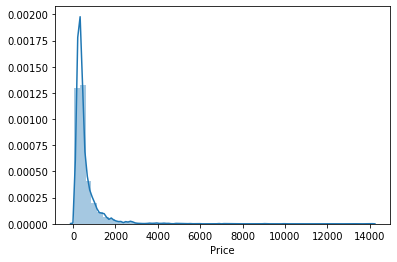

In [221]:
sns.distplot(data_copy_final['Price'])

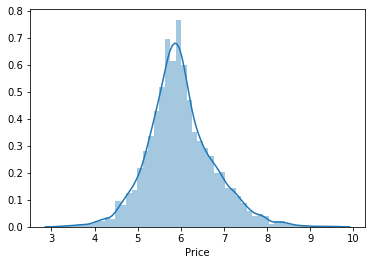

In [223]:
sns.distplot(np.log(data_copy_final['Price']))

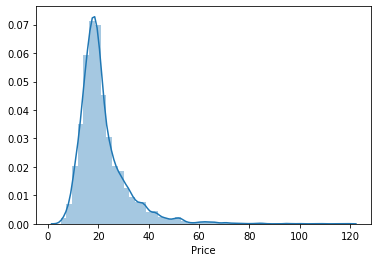

In [224]:
sns.distplot(np.sqrt(data_copy_final['Price']))

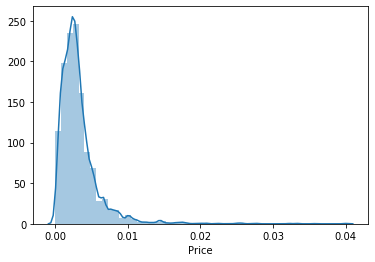

In [225]:
sns.distplot(1/(data_copy_final['Price']))

In [226]:
import scipy

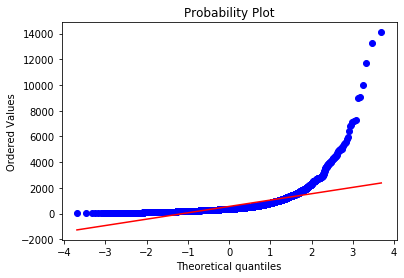

In [227]:
result = scipy.stats.probplot(data_copy_final['Price'],plot=plt)

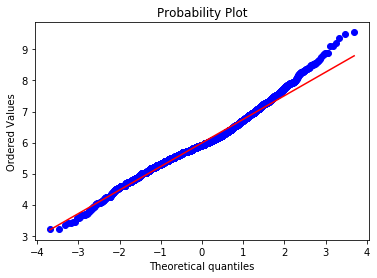

In [228]:
result = scipy.stats.probplot(np.log(data_copy_final['Price']),plot=plt)

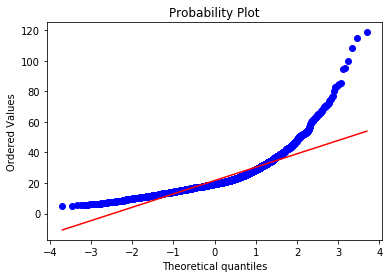

In [229]:
result = scipy.stats.probplot(np.sqrt(data_copy_final['Price']),plot=plt)